# COGS 108 - EDA Checkpoint

# Names

- Gihyeon Kown
- Janzen Molina
- Weston Monroe
- Victor Salcedo
- Rahat Sohan

<a id='research_question'></a>
# Research Question

What musical factors contribute to the average popularity of different music genres on Spotify?

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


Reading all the 7 different genre datasets.

In [2]:
alternative = pd.read_csv('alternative_music_data.csv')
blues = pd.read_csv('blues_music_data.csv')
hiphop = pd.read_csv('hiphop_music_data.csv')
indie_alt = pd.read_csv('indie_alt_music_data.csv')
metal = pd.read_csv('metal_music_data.csv')
pop = pd.read_csv('pop_music_data.csv')
rock = pd.read_csv('rock_music_data.csv')

# Data Cleaning

First, we will replace all the 'Genres' column of each datas with respective genres.

In [3]:
datas = [alternative, blues, hiphop, indie_alt, metal, pop, rock]
genres = ['alternative', 'blues', 'hiphop', 'indie_alt', 'metal', 'pop', 'rock']

for i in range(len(datas)):
    datas[i].Genres = genres[i]

We then, merge all the datas we have into a single data called genre.

In [4]:
df = pd.DataFrame()
for data in datas:
    df = pd.concat([df, data], axis=0)
df.to_csv('genre.csv', index=False)

df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,alternative,Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,alternative,Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,alternative,Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,alternative,Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,alternative,Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


Then we remove unnecessary columns (id, uri, track_href, analysis_url)

In [5]:
df = df.drop(columns=['id','uri','track_href', 'analysis_url'])
df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,alternative,Alternative 90s,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,156667,4
1,grandson,In Over My Head,60,alternative,Alternative Beats,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,198366,4
2,Foals,On The Luna,51,alternative,Alternative 10s,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,192695,4
3,Longpigs,She Said,47,alternative,Alternative 90s,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,264067,4
4,Beastie Boys,Sure Shot,57,alternative,Alternative 90s,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,199667,4


Then we normalize our musical feature values

In [6]:
scaler = MinMaxScaler()
cols_to_normalize = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,alternative,Alternative 90s,0.462083,0.908998,0.000000,0.701327,1.0,0.033021,0.001606,0.000277,0.125599,0.765720,115.998,156667,4
1,grandson,In Over My Head,60,alternative,Alternative Beats,0.588473,0.816996,0.000000,0.783582,1.0,0.041563,0.001707,0.015863,0.574533,0.630832,155.124,198366,4
2,Foals,On The Luna,51,alternative,Alternative 10s,0.530839,0.976000,0.000000,0.906633,1.0,0.049896,0.066466,0.000394,0.069891,0.867140,138.984,192695,4
3,Longpigs,She Said,47,alternative,Alternative 90s,0.212336,0.869997,0.454545,0.797125,1.0,0.063125,0.000148,0.000490,0.179676,0.524341,168.352,264067,4
4,Beastie Boys,Sure Shot,57,alternative,Alternative 90s,0.699697,0.798996,0.090909,0.743532,1.0,0.170833,0.389558,0.000000,0.294970,0.556795,97.978,199667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,rock,00s Rock Anthems,0.659252,0.765995,1.000000,0.783416,1.0,0.035938,0.000764,0.000006,0.063259,0.650101,110.011,227813,4
8743,Beloved,Failure On My Lips,37,rock,2000s Screamo,0.191102,0.971999,0.181818,0.884218,0.0,0.096979,0.000011,0.009438,0.219467,0.217039,172.049,276333,4
8744,Saint Louis,Carry Me Away,35,rock,Rocktronic,0.289181,0.881998,0.636364,0.897264,1.0,0.040625,0.004367,0.040763,0.097031,0.044422,139.584,183214,4
8745,The Smashing Pumpkins,Disarm - Remastered,64,rock,Rocktail Hour,0.532861,0.417988,0.363636,0.680486,0.0,0.028854,0.142570,0.784137,0.129681,0.220081,129.517,196905,4


Next we can standardize the column names by making every title lowercase and replacing space characters with underscores.

In [7]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df

,artist_name,track_name,popularity,genres,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,alternative,Alternative 90s,0.462083,0.908998,0.000000,0.701327,1.0,0.033021,0.001606,0.000277,0.125599,0.765720,115.998,156667,4
1,grandson,In Over My Head,60,alternative,Alternative Beats,0.588473,0.816996,0.000000,0.783582,1.0,0.041563,0.001707,0.015863,0.574533,0.630832,155.124,198366,4
2,Foals,On The Luna,51,alternative,Alternative 10s,0.530839,0.976000,0.000000,0.906633,1.0,0.049896,0.066466,0.000394,0.069891,0.867140,138.984,192695,4
3,Longpigs,She Said,47,alternative,Alternative 90s,0.212336,0.869997,0.454545,0.797125,1.0,0.063125,0.000148,0.000490,0.179676,0.524341,168.352,264067,4
4,Beastie Boys,Sure Shot,57,alternative,Alternative 90s,0.699697,0.798996,0.090909,0.743532,1.0,0.170833,0.389558,0.000000,0.294970,0.556795,97.978,199667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,rock,00s Rock Anthems,0.659252,0.765995,1.000000,0.783416,1.0,0.035938,0.000764,0.000006,0.063259,0.650101,110.011,227813,4
8743,Beloved,Failure On My Lips,37,rock,2000s Screamo,0.191102,0.971999,0.181818,0.884218,0.0,0.096979,0.000011,0.009438,0.219467,0.217039,172.049,276333,4
8744,Saint Louis,Carry Me Away,35,rock,Rocktronic,0.289181,0.881998,0.636364,0.897264,1.0,0.040625,0.004367,0.040763,0.097031,0.044422,139.584,183214,4
8745,The Smashing Pumpkins,Disarm - Remastered,64,rock,Rocktail Hour,0.532861,0.417988,0.363636,0.680486,0.0,0.028854,0.142570,0.784137,0.129681,0.220081,129.517,196905,4


We can also try to drop any observations that have missing values using dropna. However, after running the dropna method, we can see that there were no observations dropped, meaning that every observation has no missing values.

In [8]:
df = df.dropna(how='all')
df

,artist_name,track_name,popularity,genres,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,alternative,Alternative 90s,0.462083,0.908998,0.000000,0.701327,1.0,0.033021,0.001606,0.000277,0.125599,0.765720,115.998,156667,4
1,grandson,In Over My Head,60,alternative,Alternative Beats,0.588473,0.816996,0.000000,0.783582,1.0,0.041563,0.001707,0.015863,0.574533,0.630832,155.124,198366,4
2,Foals,On The Luna,51,alternative,Alternative 10s,0.530839,0.976000,0.000000,0.906633,1.0,0.049896,0.066466,0.000394,0.069891,0.867140,138.984,192695,4
3,Longpigs,She Said,47,alternative,Alternative 90s,0.212336,0.869997,0.454545,0.797125,1.0,0.063125,0.000148,0.000490,0.179676,0.524341,168.352,264067,4
4,Beastie Boys,Sure Shot,57,alternative,Alternative 90s,0.699697,0.798996,0.090909,0.743532,1.0,0.170833,0.389558,0.000000,0.294970,0.556795,97.978,199667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,rock,00s Rock Anthems,0.659252,0.765995,1.000000,0.783416,1.0,0.035938,0.000764,0.000006,0.063259,0.650101,110.011,227813,4
8743,Beloved,Failure On My Lips,37,rock,2000s Screamo,0.191102,0.971999,0.181818,0.884218,0.0,0.096979,0.000011,0.009438,0.219467,0.217039,172.049,276333,4
8744,Saint Louis,Carry Me Away,35,rock,Rocktronic,0.289181,0.881998,0.636364,0.897264,1.0,0.040625,0.004367,0.040763,0.097031,0.044422,139.584,183214,4
8745,The Smashing Pumpkins,Disarm - Remastered,64,rock,Rocktail Hour,0.532861,0.417988,0.363636,0.680486,0.0,0.028854,0.142570,0.784137,0.129681,0.220081,129.517,196905,4


We can print out the total genres that the songs in the dataset are associated with using the value_counts method.

In [9]:
df.genres.value_counts()

rock           8747
indie_alt      4338
pop            3831
metal          3045
hiphop         2581
alternative    2160
blues          2050
Name: genres, dtype: int64

# Data Analysis & Results (EDA)

To begin our Data Analysis let's take a look at the key statistics in popularity in addition to our musical features to see how the data is distributed.

In [10]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,2.675200e+04,26752.000000
mean,46.603544,0.557220,0.698942,0.481782,0.762671,0.623131,0.088761,0.187677,0.111075,0.190193,0.500771,123.791402,2.316677e+05,3.936379
std,18.890180,0.168356,0.210748,0.324248,0.091553,0.484611,0.091465,0.266478,0.247150,0.159404,0.236800,29.365056,7.955645e+04,0.334642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.379300e+04,0.000000
25%,34.000000,0.443883,0.557991,0.181818,0.719265,0.000000,0.037292,0.002380,0.000000,0.087134,0.317444,100.017000,1.862860e+05,4.000000
50%,46.000000,0.556117,0.729995,0.454545,0.780155,1.000000,0.052708,0.044629,0.000263,0.124579,0.496957,122.005000,2.176090e+05,4.000000
75%,60.000000,0.674419,0.876998,0.818182,0.825594,1.000000,0.095104,0.286145,0.033534,0.260280,0.682556,143.373000,2.582270e+05,4.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,249.438000,1.561133e+06,5.000000


It's important to note that the values range between 0 and 1 for the musical features: danceability, energey, key, loudness, mode, speechiness, accousticness, instrumentalness, liveness and valence. Tempo, duration_ms and time_signature use values that are unique to their features.

In the next section we take a closer look at specific genres and their musical feature means. This data will play a key role in determining what makes a song more popular within its specific genre.

In [11]:
df_features = df[['genres','danceability','energy','key',
                  'loudness','mode','speechiness','acousticness',
                  'instrumentalness','liveness','valence','tempo',
                  'duration_ms','time_signature']].groupby('genres').mean()
       
df_features.sort_values(by='genres',ascending=False)
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genres,,,,,,,,,,,,,
alternative,0.542925,0.693039,0.486869,0.751830,0.658796,0.070371,0.178710,0.164977,0.180274,0.520974,126.069160,223880.492130,3.939352
blues,0.570554,0.572955,0.493880,0.709773,0.667805,0.064798,0.400817,0.087200,0.199766,0.622431,121.604544,244535.600976,3.829756
hiphop,0.741898,0.638685,0.483569,0.758654,0.533514,0.245506,0.191912,0.023092,0.189089,0.545930,118.861744,204539.001162,3.991476
indie_alt,0.562024,0.661992,0.489396,0.739880,0.656293,0.069568,0.218366,0.219145,0.179440,0.501174,123.375715,228327.719225,3.941678
metal,0.420118,0.879957,0.476698,0.801339,0.581281,0.093085,0.026589,0.200648,0.216792,0.331427,127.958087,269403.029885,3.902463
pop,0.649388,0.609652,0.474929,0.769849,0.540329,0.079261,0.308769,0.025084,0.162251,0.527351,119.609968,203472.993996,3.951449
rock,0.508109,0.742125,0.478159,0.773628,0.664685,0.064840,0.126512,0.082204,0.199035,0.501054,125.783093,239448.689151,3.946953


The above data table shows the mean distribution of musical features split up by genre. Further examination will attempt to provide key insight into what combinations of musical features makes a song more successful.

Mean Musical Factors Distribution Across all Genres


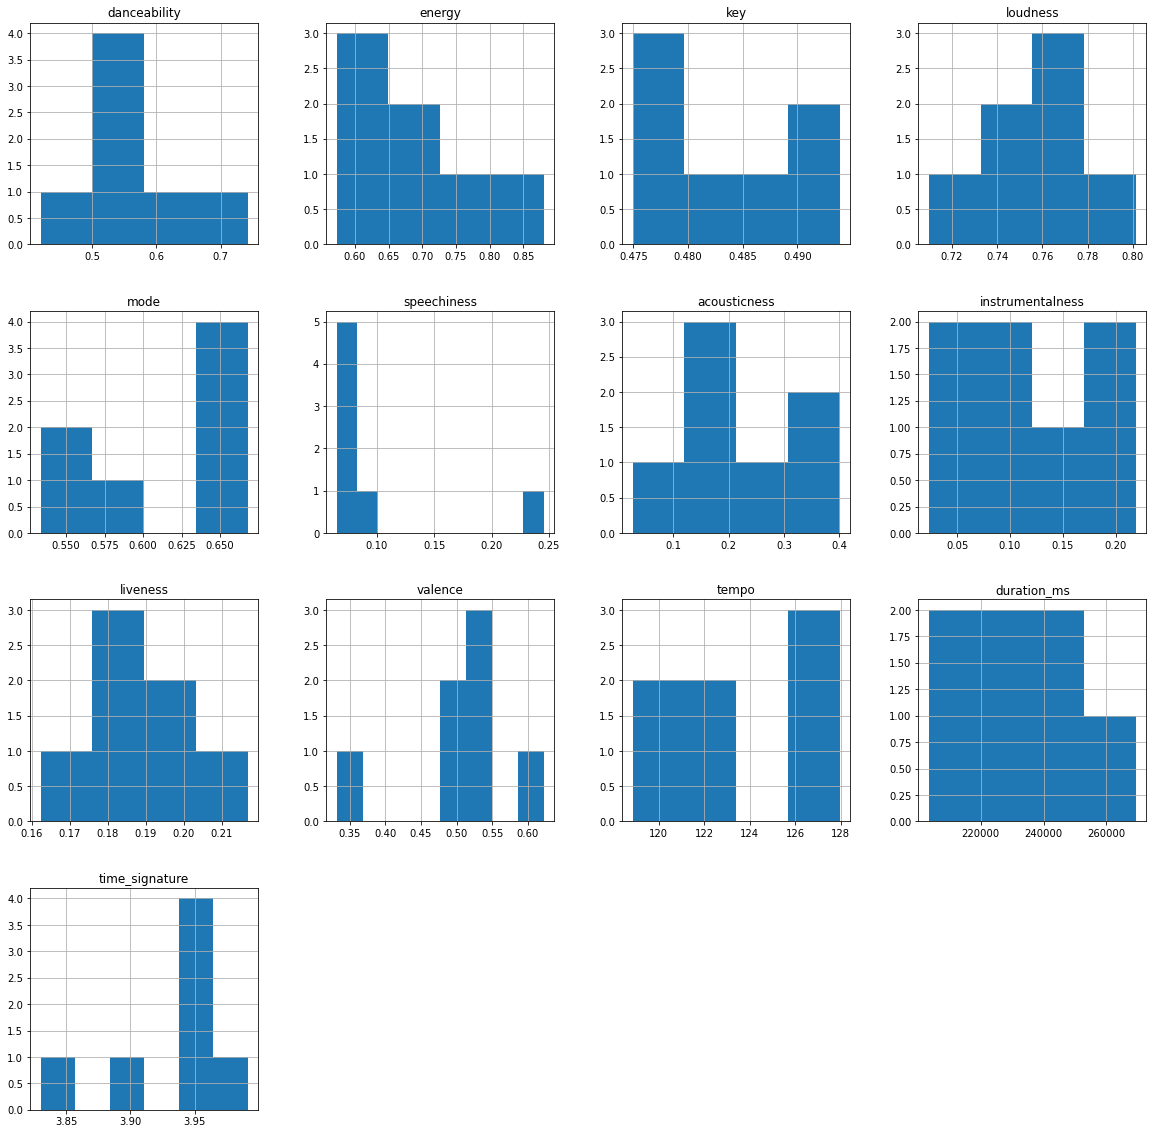

In [12]:
print("Mean Musical Factors Distribution Across all Genres")
df_features.hist(bins='auto',figsize = (20,20));





This reveals that the average genre loudness and liveness are approximately nornally distributed. Dancablility, energy, and duration look unimodal while key, mode, instrumentalness, and tempo look bimodal. Further, speechiness, varience, and time signature apprear to have outliers. The average genre features have diverse distributions overall.

In the next section we take a closer look at specific genres and their mean popularity.

In [13]:
df_pop = df[['popularity','genres']].groupby('genres').mean()
df_pop.columns = ['mean_popularity']
df_pop=df_pop.sort_values(by='mean_popularity', ascending=False)
df_pop




,mean_popularity
genres,
pop,53.173062
hiphop,50.826424
rock,48.797645
alternative,46.292593
metal,42.803284
indie_alt,42.723144
blues,33.831707


We can see that pop has the highest mean_popularity. Pop as the highest mean_popularity makes sense because it ecompasses mutliple genres; however, do the various musical factors determine higher mean_popularity?

Next, we'll take a look at the distribution of musical factors in all genres combined and compare that to overall mean_popularity of all genres combined.
        

Popularity Distribution vs Musical Factors Distribution Across all Genres


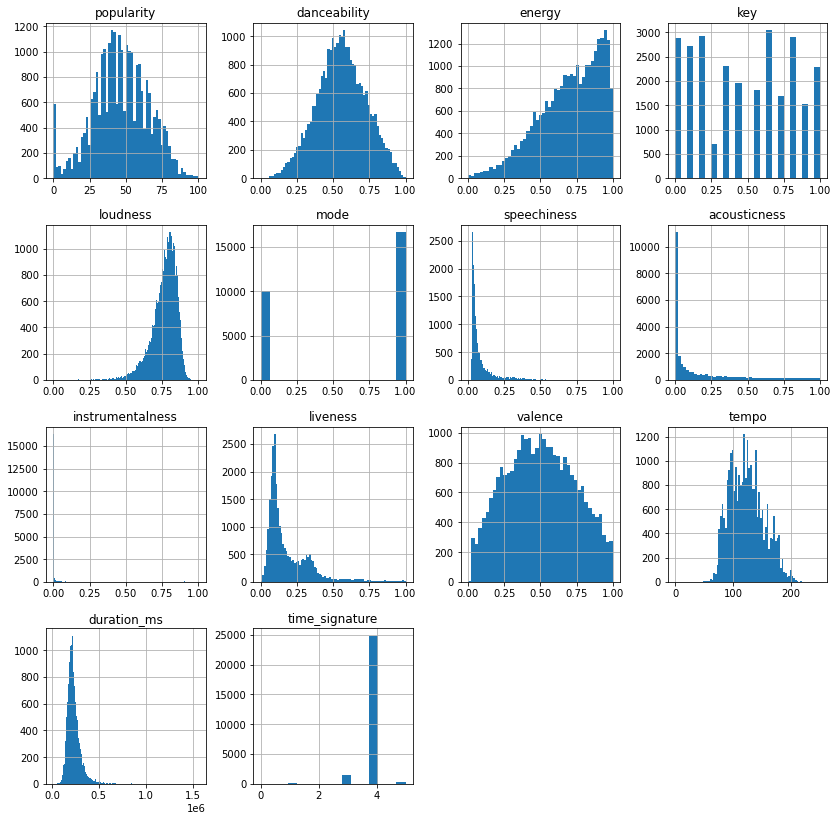

In [14]:
print("Popularity Distribution vs Musical Factors Distribution Across all Genres")
df.hist(bins='auto',figsize = (14,14));

We see that popularity, danceability, loudness, valence, tempo, and duration are roughly normal. Intriguingly, popularity spikes at 0 and is very jagged. The former may be because many songs do not get popular, while the latter may be due to the coarseness of Spotify's popularity algorithm.

Based on the above histograms, popularity distribution is similar to danceability, valence, and tempo. Is it possible that danceability, valence and tempo are the keys to predicting a song's success?

Next we use a heat map to plot and check for any correlations that may exist between all of the musical variables. If the correlation is too high, then we may have to remove them from our data set.

/tmp/ipykernel_741/2126815437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr())));


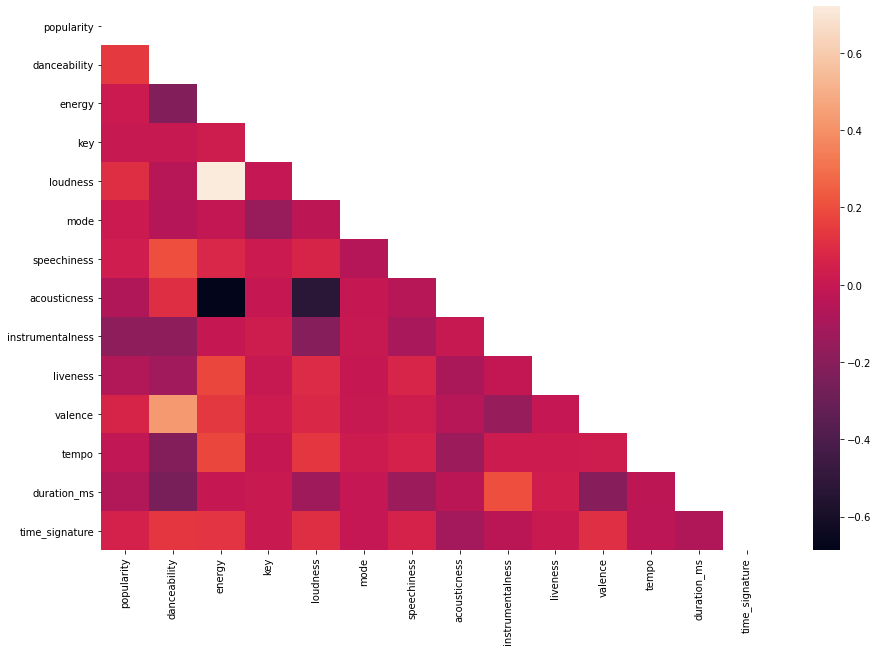

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr())));

In the heatmap above, we can quickly see where there is a higher correlation value by looking for black or white squares. This heat map shows high correlation between loudness and energy; acousticness and energy; and acousticness and loudness. We must determine whether these features are too high to remain in our data set. The following shows that while these features have a high correlation we can still keep them and use within our data sets.

In [16]:
df[["acousticness", "energy", "loudness"]].corr()

,acousticness,energy,loudness
acousticness,1.000000,-0.686252,-0.532320
energy,-0.686252,1.000000,0.720304
loudness,-0.532320,0.720304,1.000000


After review of the correlation values of acousticness, energy and loudness; it appears that the correlation is not high enough to be removed. Now that we have our data prepared, we will continue onto the next area. In the next area we will use various machine learning algorithms to compare against our baseline model. Then we will select the machine learning algorithm that has the best predictive model. 



## Machine Learning Analysis